In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use("ggplot")

df = pd.read_csv('data/2016_world_happiness_report.csv')
df = df.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 'Happiness Rank'], axis=1)
df.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


### Scatterplot 

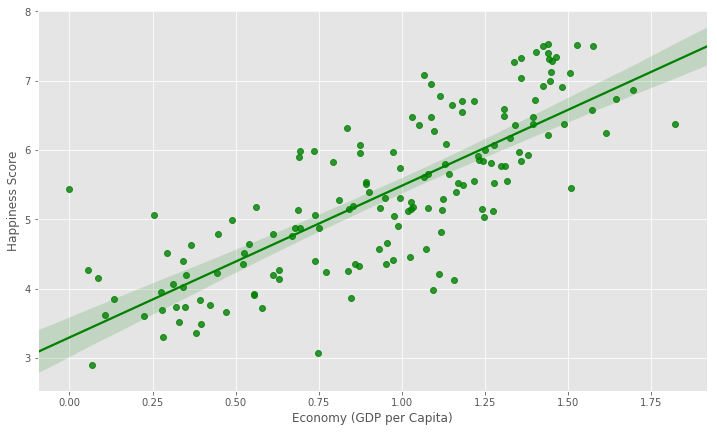

In [2]:
plt.figure(figsize=(12,7))
sns.regplot(df['Economy (GDP per Capita)'],df['Happiness Score'], color='green')
plt.show()

### Jointplot

<Figure size 864x504 with 0 Axes>

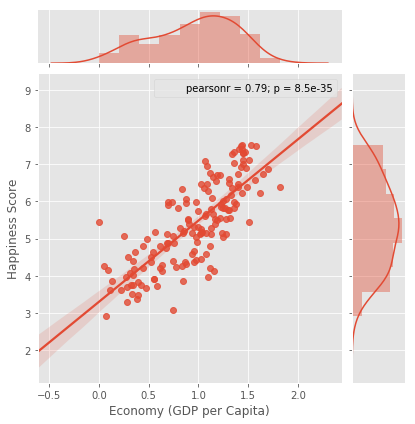

In [3]:
plt.figure(figsize=(12,7))
sns.jointplot(df['Economy (GDP per Capita)'], df['Happiness Score'], kind="regg")
plt.show()

### PairGrid

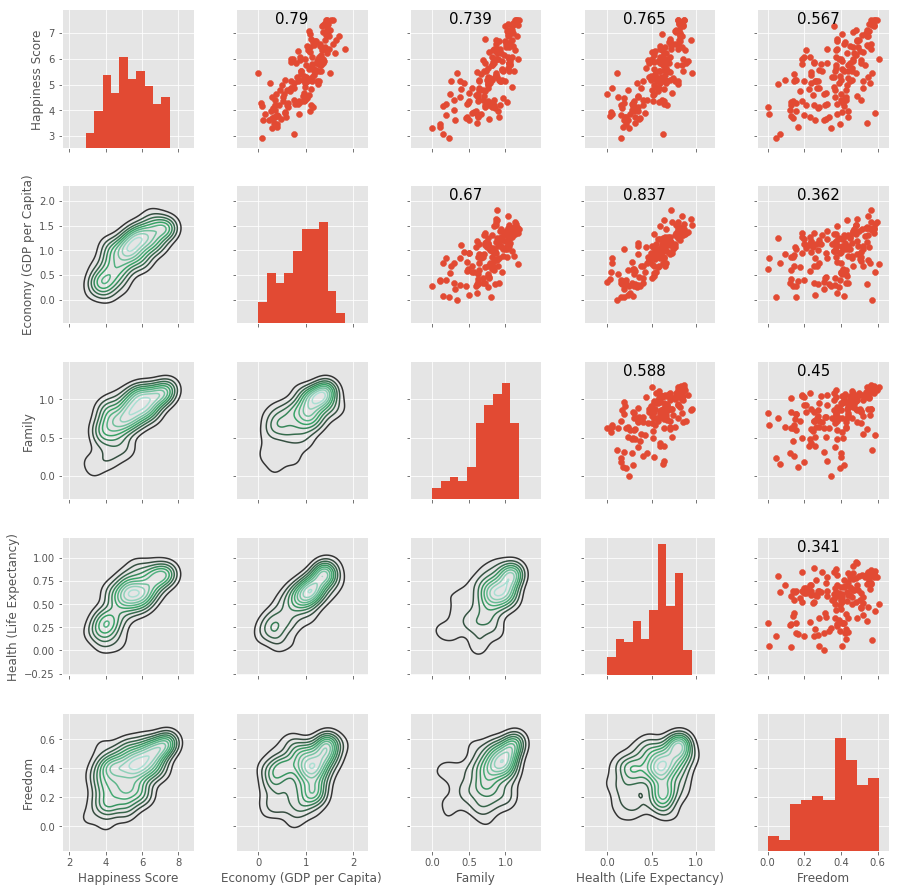

In [4]:
def corr(x, y, **kwargs):
    
    coef = np.corrcoef(x, y)[0][1]
    label = str(round(coef, 3))
    ax = plt.gca()
    ax.annotate(label, xy = (0.3, 0.9), xycoords = ax.transAxes, size = 15)
    
pg = sns.PairGrid(df[['Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom']])
pg.map_upper(plt.scatter)
pg.map_upper(corr)
pg.map_diag(plt.hist)
pg.map_lower(sns.kdeplot)
plt.show()

In [5]:
df[['Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Freedom']].corr(method= "pearson")

,Happiness Score,Economy (GDP per Capita),Family,Freedom
Happiness Score,1.000000,0.790322,0.739252,0.566827
Economy (GDP per Capita),0.790322,1.000000,0.669540,0.362283
Family,0.739252,0.669540,1.000000,0.450208
Freedom,0.566827,0.362283,0.450208,1.000000


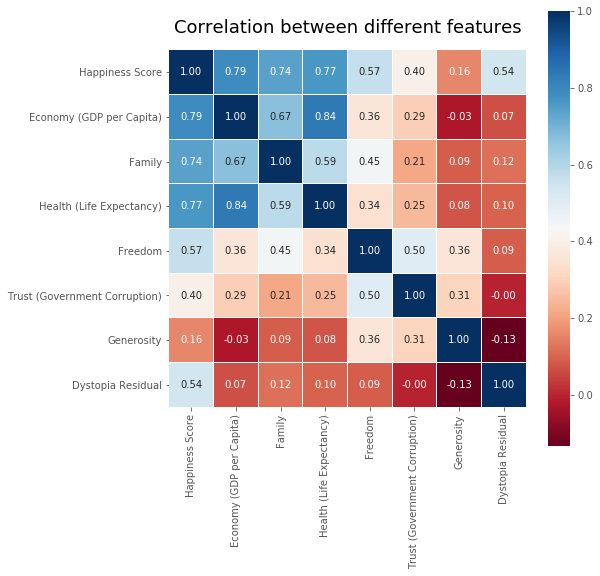

In [10]:
a,x = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, linecolor='white', square = True, 
            linewidths= 0.1, vmax = 1, fmt= '.2f', cmap = 'RdBu',ax=x)
plt.title('Correlation between different features', y=1.03, size=18)
plt.show()

### Lineer Regresyon

In [7]:
y = df['Happiness Score']
X = df[['Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
coef = pd.DataFrame(lm.coef_,X.columns)
coef.columns = ['coefficients']
coef.sort_values(by='coefficients', ascending=False)

,coefficients
Freedom,1.000337
Trust (Government Corruption),1.000256
Economy (GDP per Capita),0.999984
Dystopia Residual,0.999976
Generosity,0.999963
Family,0.999952
Health (Life Expectancy),0.999736


MAE: 0.0002762766
MSE: 1.024e-07
RMSE: 0.0003200238


Text(0.5,1,'Residual Plot')

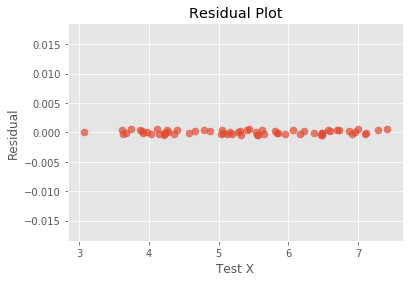

In [9]:
pred = lm.predict(X_test)
    
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, pred),10))
print('MSE:', round(metrics.mean_squared_error(y_test, pred),10))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),10))

plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, s=50, alpha=0.7)
plt.xlabel('Test X')
plt.ylabel('Residual')
plt.title('Residual Plot')